In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 歸一
])
# print(transform)

# 訓練數劇集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2) # num_workers線程數

# 測試數據集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2) # num_workers線程數

Files already downloaded and verified
Files already downloaded and verified


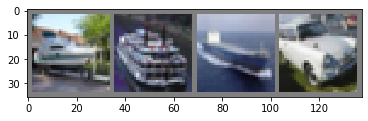

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    # 輸入數據: torch.tensor [c, h, w]
    img = img / 2+0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0)) # [h, w, c]
    plt.imshow(nping)

dataiter = iter(trainloader) # 隨機加載一個mini batch
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self): # 定義神經網路結構, 輸入數據 3x32x32
        super(Net, self).__init__()
        # 第一層(卷基層)
        self.conv1 = nn.Conv2d(3, 6, 3) # 輸入頻道3, 輸出頻道6, 卷積3x3
        # 第二層(卷基層)
        self.conv2 = nn.Conv2d(6, 16, 3) # 輸入頻道6, 輸出頻道16, 卷積3x3
        # 第三層(全連接層)
        self.fc1 = nn.Linear(16*28*28, 512) # 輸入維度16x28x28=12544, 28的原因是經過了兩層神經層,經過一層扣2, 輸出維度512
        # 第四層(全連接層)
        self.fc2 = nn.Linear(512, 64) # 輸入維度512, 輸出維度64
        # 第五層(全連接層)
        self.fc3 = nn.Linear(64, 10) # 輸入維度64, 輸出維度10

    def forward(self, x): # 定義數據流向
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = x.view(-1, 16*28*28) # view=>重定型
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        
        return x

In [5]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # 交叉熵損失函數
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
train_loss_hist = []
test_loss_hist = []

for epoch in range(20):
    # 訓練
    # 使用PyTorch进行训练和测试时一定注意要把实例化的model指定train/eval，eval（）时，框架会自动把BN和DropOut固定住，不会取平均，而是用训练好的值，不然的话，一旦test的batch_size过小，很容易就会被BN层导致生成图片颜色失真极大！！！！！
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        images, labels = data
        outputs = net(images)
        loss = criterion(outputs, labels) # 計算損失

        optimizer.zero_grad() # 梯度前, 首先歸0
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i%250 == 0): # 每250 mini batch 測試一次
            correct = 0.0
            total = 0.0

            # eval(str)函數很強大,官方解釋為:將字符串str當成有效的表達式來求值並返回計算結果.所以,結合math當成一個計算器很好用.
            net.eval()
            with torch.no_grad():
                for test_data in testloader:
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
            
            train_loss_hist.append(running_loss/250)
            test_loss_hist.append(test_loss.item())
            running_loss=0.0
        if i%250 == 0:
            print(f'Epoch:{epoch}, Step{i}:, Loss:{loss.item()}')

Epoch:0, Step0:, Loss:2.3530149459838867
Epoch:0, Step250:, Loss:2.3138487339019775
Epoch:0, Step500:, Loss:1.778533935546875
Epoch:0, Step750:, Loss:2.2191104888916016
Epoch:0, Step1000:, Loss:1.9134677648544312
Epoch:0, Step1250:, Loss:2.1689226627349854
Epoch:0, Step1500:, Loss:1.3784559965133667
Epoch:0, Step1750:, Loss:1.8018457889556885
Epoch:0, Step2000:, Loss:1.5830588340759277
Epoch:0, Step2250:, Loss:1.7441681623458862
Epoch:0, Step2500:, Loss:1.4647728204727173
Epoch:0, Step2750:, Loss:0.8561553955078125
Epoch:0, Step3000:, Loss:1.5159891843795776


KeyboardInterrupt: 

In [8]:
plt.figure()
plt.plot(train_loss_hist)
plt.plot(test_loss_hist)
plt.legend(('train loss', 'test loss'))
plt.title('Train/Teat Loss')
plt.xlabel('# mini batch *250')
plt.ylabel('Loss')

NameError: name 'temp' is not defined